# Activity
- Choose two variables within your Project
    - X,y
- Create a suitable model for regression
    - Normal Equation
    - Our LR Class
    - Sklearn implementation
- Compare the results with    
    - MSE
    - RMSE 
    - MAS


# Choose two variables within your Project
$X$ : ABV (Alcohol By Volume ) , $y$ : Price (In Dollars)


## The dataset was modified in  1.0-lobr-initial-data-exploration.ipynb
https://www.kaggle.com/datasets/limtis/wikiliq-dataset
## About Dataset

### Parsed data from WikiliQ website.
### Data is presented as-is. It wasn't cleaned, nor modified in any way.

#### There are three CSV files, containing information about wine, beer and liquors (Including whiskey, beer, vodka, liquors and spirits)

- Common columns between these 3 files:
- Name (of the product),
- Brand,
- Country,
- Categories (Type of beer/wine/liquor)
- ABV (Alcohol by volume) (USED FOR THIS ACTIVITIE)
- IBU (International Bitterness Units scale)
- Suggested Serving Temperature (in Fahrenheit)
- Rating (Scale 0 to 5)
- Rate count (Amount of reviews, the rating is based on)
- Price (Sometimes might be incorrect, be careful) (USED FOR THIS ACTIVITIE)
- Volume (Volume, the price is set for)
- Description [of a product] (Mostly descriptions, but sometimes may be filled with contacts of a brand, or company's history)

There are additional columns in every file, but names speak for themselves.

In [766]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [767]:
# Reading data and removing index col
df = pd.read_csv('../data/interim/beer_data_only_ABV_Price.csv')

In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12464 entries, 0 to 12463
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ABV     12464 non-null  float64
 1   Price   12464 non-null  float64
dtypes: float64(2)
memory usage: 194.9 KB


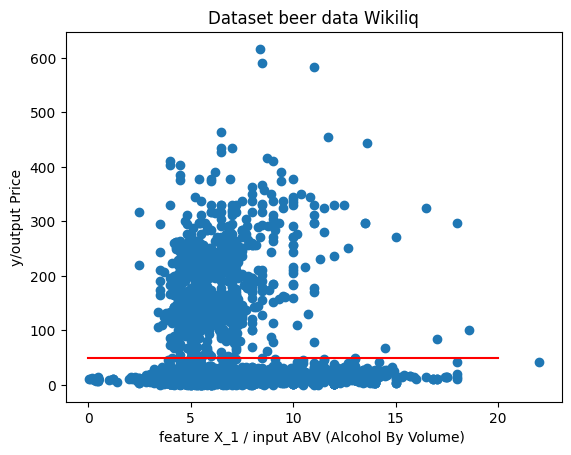

In [769]:
y_corte=50 
plt.scatter(df["ABV"],df['Price'])
plt.xlabel("feature X_1 / input ABV (Alcohol By Volume) ")
plt.ylabel("y/output Price")
plt.title("Dataset beer data Wikiliq")
plt.plot((0,20),(y_corte,y_corte),color = 'r', label=f"line ")

Text(0.5, 1.0, 'Dataset beer data Wikiliq')

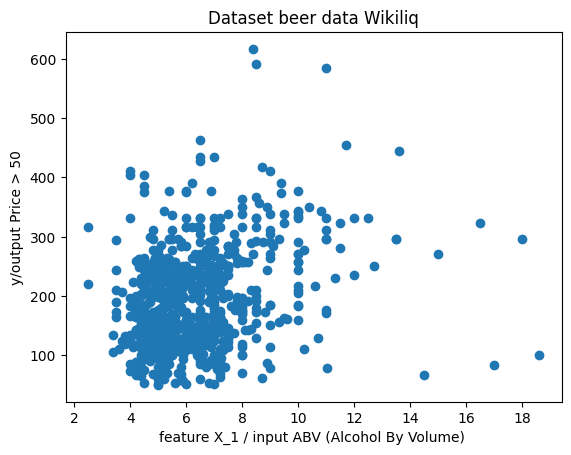

In [770]:
# As the data shows 2 types of paterns I will cut the data for Price Greater than y_corte in $ dollars

df=df[(df["Price"] > y_corte)]
plt.scatter(df["ABV"],df['Price'])
plt.xlabel("feature X_1 / input ABV (Alcohol By Volume) ")
plt.ylabel(f"y/output Price > {y_corte}")
plt.title("Dataset beer data Wikiliq")

# Create a suitable model for regression
   

In [771]:
# Convert information from pandas to numpy and leave a correct shape for X
X=df["ABV"].to_numpy()
print(X.shape)
m=X.shape[0]
print(m)
X=X.reshape(m,1)
X.shape

(780,)
780


(780, 1)

In [772]:
# Convert information from pandas to numpy and leave a correct shape for y
y=df["Price"].to_numpy()
print(y.shape)
m=y.shape[0]
print(m)
y=y.reshape(m,1)
y.shape

(780,)
780


(780, 1)

In [773]:
# Create a set of data for training and test to compare
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)


In [774]:
X_train.shape

(624, 1)

In [775]:
X_test.shape

(156, 1)

## Normal Equation
$$
\theta = (X^TX)^{-1} X^T y
$$

In [776]:
# add X0 x= 1, to each instance -> bias
# Matriz de diseño
# concatena un arreglo de unos  con los valores de los Features(X) de el tamaño x_size

x_size=X_train.shape[0]
x_size
X_b = np.c_[np.ones((x_size,1)),X_train]
X_b[0:5]

array([[1. , 4.5],
       [1. , 5. ],
       [1. , 5.1],
       [1. , 6.2],
       [1. , 5.6]])

In [777]:
# Ejecuta ecuacion cerrada
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

print(f"Theta(s): \n {theta}")
print(f"Bias: {theta[0]}, W/slope: {theta[1]}")

Theta(s): 
 [[122.49791731]
 [ 10.44579493]]
Bias: [122.49791731], W/slope: [10.44579493]


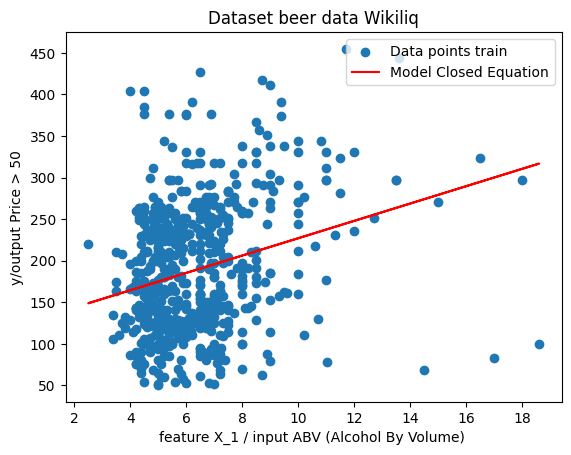

In [778]:
plt.scatter(X_train, y_train, label = "Data points train")
# X * theta
plt.plot(X_train, X_b.dot(theta), c = "r", label = "Model Closed Equation")
plt.xlabel("feature X_1 / input ABV (Alcohol By Volume) ")
plt.ylabel(f"y/output Price > {y_corte}")
plt.title("Dataset beer data Wikiliq")
plt.legend()

In [779]:

x_size=X_test.shape[0]
x_size
X_test_b = np.c_[np.ones((x_size,1)),X_test]
X_test_b[0:5]

array([[1. , 5.5],
       [1. , 6.2],
       [1. , 4.2],
       [1. , 5. ],
       [1. , 7. ]])

In [780]:
y_preds = X_test_b.dot(theta)
y_preds[0:5]

array([[179.94978942],
       [187.26184588],
       [166.37025601],
       [174.72689196],
       [195.61848182]])

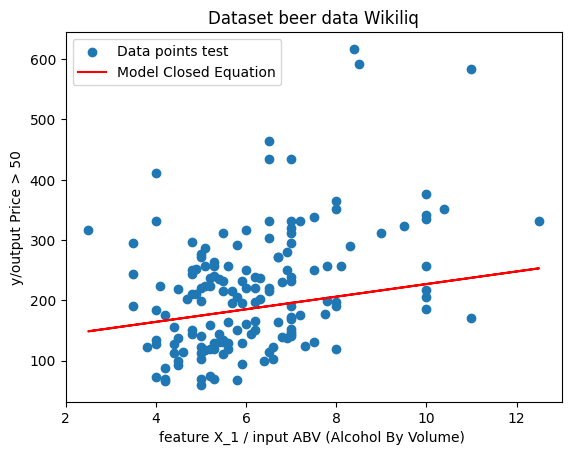

In [781]:
plt.scatter(X_test, y_test, label = "Data points test")
# X * theta
plt.plot(X_test, X_test_b.dot(theta), c = "r", label = "Model Closed Equation")
plt.xlabel("feature X_1 / input ABV (Alcohol By Volume) ")
plt.ylabel(f"y/output Price > {y_corte}")
plt.title("Dataset beer data Wikiliq")
plt.legend()

In [782]:
y_true_normal_equation=y_test
y_preds_normal_equation=y_preds

## Our LR Class

In [783]:

class LinearReg:

    def __init__(self, lr = 0.01, epochs = 100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):

        #This is going to look like (150,1) where m is 150 and n 1
        m, n = X.shape

        #Generates a random of n values in a list of 1 rows
        self.weights = np.random.rand(n, 1)
        self.bias = np.random.rand(1)

        # convert a value like (150,) to (150,1)
        y = y.reshape(m, 1)

        losses = list()
        b_list = list()
        w_list = list()

        for epoch in range(self.epochs):

            # calculate prediction
            # y ^ = wx + b
            y_hat = np.dot(X, self.weights) + self.bias

            # get loss - L - J
            loss = np.mean((y - y_hat)**2) # MSE
            losses.append(loss)

            # calculate gradient
            dw = (-2 / m) * np.dot(X.T, (y - y_hat))
            db = (-2 / m) * np.sum((y - y_hat))

            # update params
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

            w_list.append(self.weights)
            b_list.append(self.bias)

            #print(f"epoch: {epoch}, loss: {loss}, w: {self.weights}, b: {self.bias}")

        return self.weights, self.bias, losses, b_list, w_list
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [784]:
model_linear_regression_from_scratch = LinearReg(lr=0.015,epochs =30)

w, b, losses, b_list, w_list = model_linear_regression_from_scratch.fit(X_train, y_train)


In [785]:
print(f"Bias: {b}, W/slope: {w}")

Bias: [13.77552202], W/slope: [[26.10472358]]


Text(0, 0.5, 'loss')

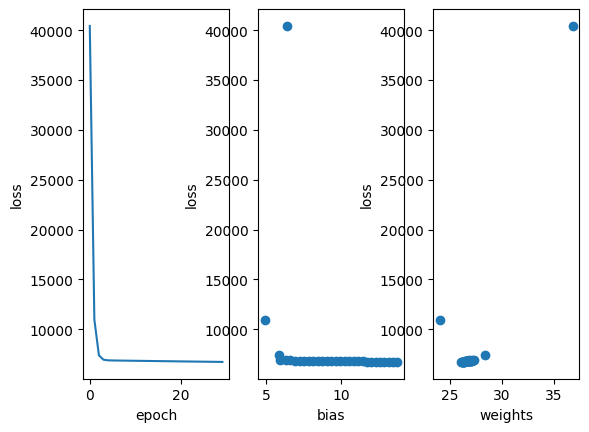

In [786]:
plt.subplot(1, 3, 1)
plt.plot(np.arange(len(losses)), losses)
plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(1, 3, 2)
plt.scatter(b_list, losses)
plt.xlabel("bias")
plt.ylabel("loss")

plt.subplot(1, 3, 3)
plt.scatter(w_list, losses)
plt.xlabel("weights")
plt.ylabel("loss")

In [787]:
y_predicted_regression_from_scratch=model_linear_regression_from_scratch.predict(X_test)
y_predicted_regression_from_scratch[0:5]

array([[157.35150173],
       [175.62480824],
       [123.41536107],
       [144.29913994],
       [196.5085871 ]])

# Sklearn implementation

In [788]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [789]:
# bias           , slope
linear_regression_model.intercept_, linear_regression_model.coef_

(array([122.49791731]), array([[10.44579493]]))

In [790]:
y_preds_linear_regresion=linear_regression_model.predict(X_test)
y_preds_linear_regresion[0:5]

array([[179.94978942],
       [187.26184588],
       [166.37025601],
       [174.72689196],
       [195.61848182]])

In [791]:
from sklearn.linear_model import SGDRegressor

linear_regression_SGDRegressor_model = SGDRegressor()
linear_regression_SGDRegressor_model.fit(X_train, y_train.reshape(-1))


SGDRegressor()

In [792]:
linear_regression_SGDRegressor_model.intercept_, linear_regression_SGDRegressor_model.coef_

(array([105.33237556]), array([13.90094819]))

In [793]:
y_preds__SGDRegressor=linear_regression_SGDRegressor_model.predict(X_test)
y_preds__SGDRegressor[0:5]

array([181.78759061, 191.51825434, 163.71635796, 174.83711651,
       202.63901289])

# Compare the results with:

### MSE: Mean squared error

### RMSE: Root mean squared error

### MAS: Mean absolute error

In [794]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

In [795]:
def getMetrics(y_true,y_preds):
    metric_results=dict()
    mse=mean_squared_error(y_true, y_preds)
    metric_results["mse"]=mse
    rmse=root_mean_squared_error(y_true, y_preds)
    metric_results["rmse"]=rmse
    msa=mean_absolute_error(y_true, y_preds)
    metric_results["msa"]=msa

    return metric_results

def printMetrics(model_name,y_true,y_preds):
    metric_results=getMetrics(y_true,y_preds)
    print(f"showing metrics of {model_name}:")
    for key  in metric_results:
        print(f"{key}: {metric_results[key]}")
    print("\n")
    return metric_results

def pretyMetricString(metrics:dict):
    return "mse:%.3f rmse:%.3f msa:%.3f" % (float(metrics["mse"].round(3)),float(metrics["rmse"].round(3)),float(metrics["msa"].round(3)))


In [796]:
y_true=y_test
normal_equation_metrics=printMetrics("Normal equation",y_true,y_preds_normal_equation)


regression_from_scratch_metrics=printMetrics("Linear Regresion coded in class",y_true,y_predicted_regression_from_scratch)

linear_regresion_metrics=printMetrics("Linear regresion SKLearn",y_true,y_preds_linear_regresion)
sgd_regressor_metrics=printMetrics("Stochastic Gradient Descent SKLearn",y_true,y_preds__SGDRegressor)

showing metrics of Normal equation:
mse: 9638.254523782725
rmse: 98.17461241982433
msa: 74.70079549537286


showing metrics of Linear Regresion coded in class:
mse: 9906.260487544487
rmse: 99.53019887222413
msa: 74.755794689363


showing metrics of Linear regresion SKLearn:
mse: 9638.25452378268
rmse: 98.1746124198241
msa: 74.70079549537277


showing metrics of Stochastic Gradient Descent SKLearn:
mse: 9191.004541838187
rmse: 95.86972693107136
msa: 73.75291803177434




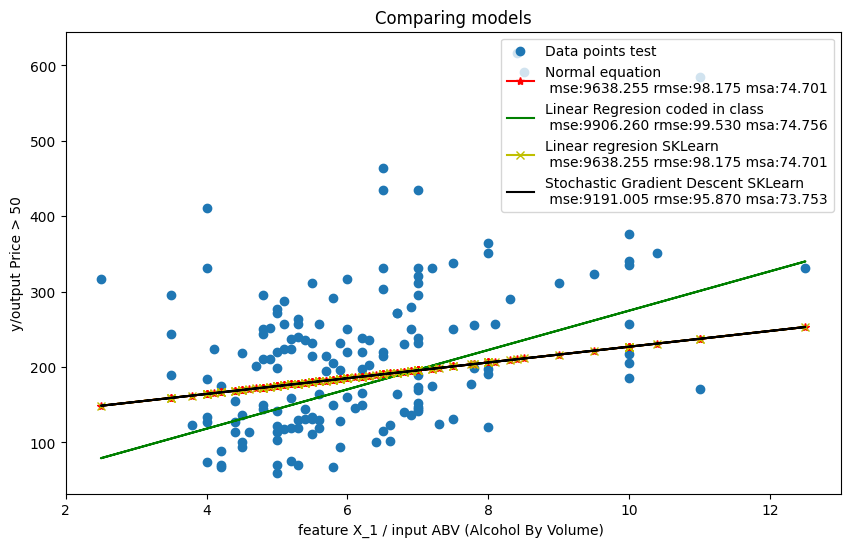

In [797]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, label = "Data points test")
# X * theta
plt.plot(X_test, y_preds_normal_equation, c = "r", label = f"Normal equation \n {pretyMetricString(normal_equation_metrics)}",marker = '*')
plt.plot(X_test, y_predicted_regression_from_scratch, c = "g", label = f"Linear Regresion coded in class \n {pretyMetricString(regression_from_scratch_metrics)}")
plt.plot(X_test, y_preds_linear_regresion, c = "y", label = f"Linear regresion SKLearn  \n {pretyMetricString(linear_regresion_metrics)}",marker = 'x')
plt.plot(X_test, y_preds_linear_regresion, c = "k", label = f"Stochastic Gradient Descent SKLearn \n {pretyMetricString(sgd_regressor_metrics)}")
plt.xlabel("feature X_1 / input ABV (Alcohol By Volume) ")
plt.ylabel(f"y/output Price > {y_corte}")
plt.title("Comparing models")
plt.legend()


